In [1]:
# Data Import and Examination

# Training data

import pandas as pd
import numpy as np

folderpath='./human-protein-atlas-image-classification/'
train_target=pd.read_csv(folderpath+'train.csv')
train_target.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [2]:
train_target.size

62144

A total number of 62,144 training data are included in the Human Protein Image dataset.

In [2]:
def class_expand(datarow):
    labels=np.array(datarow['Target'].split()).astype(int)
    for label in labels:
        col_name='Cls'+str(label)
        datarow[col_name]=1
    return datarow

In [3]:
# Convert train and test target into binary dataframe
col_names=[]
tot_class=28
for i in range(28):
    col_names.append('Cls'+str(i))
df = pd.DataFrame(columns = col_names)
train_target2=train_target.join(df).fillna(0)
train_target2=train_target2.apply(class_expand, axis=1)
train_target2.head()

,Id,Target,Cls0,Cls1,Cls2,Cls3,Cls4,Cls5,Cls6,Cls7,...,Cls18,Cls19,Cls20,Cls21,Cls22,Cls23,Cls24,Cls25,Cls26,Cls27
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
# Save the processed training file
out_trainfile=folderpath+'train_v2.csv'
train_target2.to_csv(out_trainfile, index=None, encoding='utf-8')

In [5]:
train_class_cnt=pd.DataFrame(train_target2[col_names].sum(axis=0).sort_values(ascending=False)).reset_index()
train_class_cnt.columns=['Class','Counts']
train_class_cnt.head()

,Class,Counts
0,Cls0,12885
1,Cls25,8228
2,Cls21,3777
3,Cls2,3621
4,Cls23,2965


In [6]:
# Data Exploration

## Distribution of class labels in training data set

label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

class_labels=pd.DataFrame(columns=['Class','Label_Name'])
class_labels
for k,v in label_names.items():
    class_labels=class_labels.append({'Class': 'Cls'+str(k), 'Label_Name':v}, ignore_index=True)
class_labels.head()

,Class,Label_Name
0,Cls0,Nucleoplasm
1,Cls1,Nuclear membrane
2,Cls2,Nucleoli
3,Cls3,Nucleoli fibrillar center
4,Cls4,Nuclear speckles


In [7]:
train_class_cnt2=train_class_cnt.merge(class_labels, on='Class')
total_cnt=train_class_cnt2['Counts'].sum()
#print(total_cnt)
train_class_cnt2.loc[:,'Prct']=train_class_cnt2['Counts']/total_cnt*100.0
train_class_cnt2.head()

,Class,Counts,Label_Name,Prct
0,Cls0,12885,Nucleoplasm,25.373164
1,Cls25,8228,Cytosol,16.202591
2,Cls21,3777,Plasma membrane,7.437675
3,Cls2,3621,Nucleoli,7.130479
4,Cls23,2965,Mitochondria,5.838683


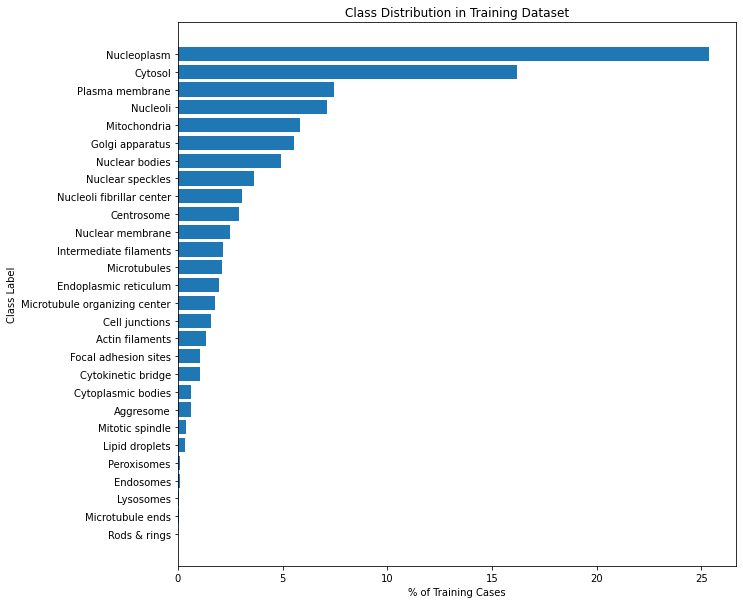

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(train_class_cnt2['Label_Name'], train_class_cnt2['Prct'])
plt.gca().invert_yaxis()
plt.xlabel('% of Training Cases')
plt.ylabel('Class Label')
plt.title("Class Distribution in Training Dataset")
plt.show()

In [9]:
# Number of classes in each image
train_class_cnt3=pd.DataFrame(train_target2[col_names].sum(axis=1).sort_values(ascending=False)).reset_index()
train_class_cnt3.columns=['ID','Counts']
train_class_cnt3.head()

,ID,Counts
0,2908,5
1,26684,5
2,9705,4
3,26201,4
4,14150,4


In [10]:
train_class_cnt4=train_class_cnt3.groupby('Counts').agg('count').reset_index()
#print(train_target2.shape[0])
train_class_cnt4.loc[:,'Prct']=train_class_cnt4['ID']/train_target2.shape[0]*100.0
train_class_cnt4

,Counts,ID,Prct
0,1,15126,48.680484
1,2,12485,40.180870
2,3,3160,10.169928
3,4,299,0.962281
4,5,2,0.006437


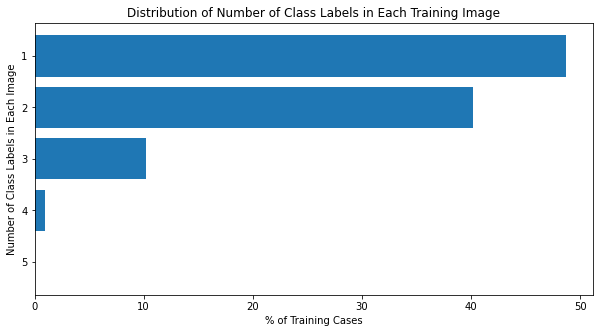

In [11]:
plt.figure(figsize=(10,5))
plt.barh(train_class_cnt4['Counts'], train_class_cnt4['Prct'])
plt.gca().invert_yaxis()
plt.xlabel('% of Training Cases')
plt.ylabel('Number of Class Labels in Each Image')
plt.title("Distribution of Number of Class Labels in Each Training Image")
plt.show()

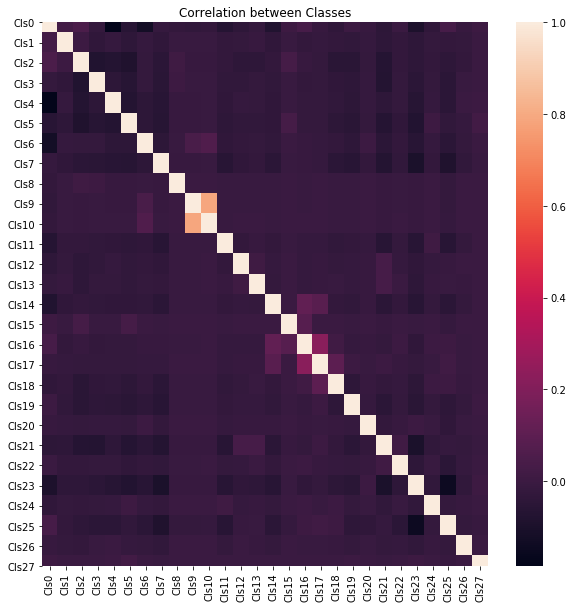

In [14]:
# Correlation between labels
import seaborn as sns
plt.figure(figsize=(10,10))
train_label_corr = train_target2.corr()
plt.title('Correlation between Classes')
#train_label_corr.head()
sns.heatmap(train_label_corr)

In [ ]:
It is seen that the most common protein class is Nucleoplasm, which is about 21% of the total training data set. It is followed by the class of Cytosol, which is about 13% of total training dta. Most of training images have one class label, \
but a few of them have as many as 5 class labels. Classes 9 and 10 (that is, Endosomes and Lysosomes) have a higher correlation, which means that they are usuully located in the same image. \
Classes 16 and 17 (i.e., Cytokinetic bridge and Mitotic spindle) have certain correlation.

In [15]:
# Explore training images
from os import listdir

# Check to see if each sample has four-channel images
train_img_path=folderpath+'train'
files=listdir(train_img_path)
print('Length of files:',len(files))              
print('Number of files that are needed:', train_target2.shape[0]*4)

Length of files: 124288
Number of files that are needed: 124288


In [ ]:
The above numbers are equal which indicate that each sample has four images.

In [15]:
# Verify whether image files are corrupted (This module takes time to run)
import os
from PIL import Image

for file in os.listdir(train_img_path):
    try:
        file_path=os.path.join(train_img_path,file)
        img = Image.open(file_path) # open the image file
        img.verify() # verify that it is, in fact an image                
    except (IOError, SyntaxError) as e:
            print(file_path)
            #    print('Bad file:', filename) # print out the names of corrupt files
            os.remove(file_path)              

In [ ]:
No file is corrupted.

In [16]:
# Visualize specific class of images
class_nbr=9 # Starting from 0
train_selected_class=train_target2.loc[train_target2['Cls'+str(class_nbr)]==1]
total_cls_nbr=train_selected_class.shape[0]
print('Total number of samples with Class', class_nbr, 'is', total_cls_nbr)

Total number of samples with Class 9 is 45


In [4]:
import matplotlib.image as mpimg

def load_image(img_id, imgpath):
    images=np.zeros(shape=(4,512,512))
    #imgpath2=path.join(os.path.abspath, imgpath)
    #print(imgpath+'/'+img_id+'_blue.png')
    images[0,:,:]=mpimg.imread(imgpath+'/'+img_id+'_blue.png')
    images[1,:,:]=mpimg.imread(imgpath+'/'+img_id+'_green.png')
    images[2,:,:]=mpimg.imread(imgpath+'/'+img_id+'_red.png')
    images[3,:,:]=mpimg.imread(imgpath+'/'+img_id+'_yellow.png')
    return images

In [18]:
# Image IDs
sample_to_view=3
starting_location=1
sample_ids=[]
for i in range(sample_to_view):
    sample_ids.append(train_selected_class.iloc[starting_location-1+i].Id)
sample_ids    


['01314a58-bba3-11e8-b2b9-ac1f6b6435d0',
 '051f96a8-bbab-11e8-b2ba-ac1f6b6435d0',
 '0e029d2e-bbbf-11e8-b2ba-ac1f6b6435d0']

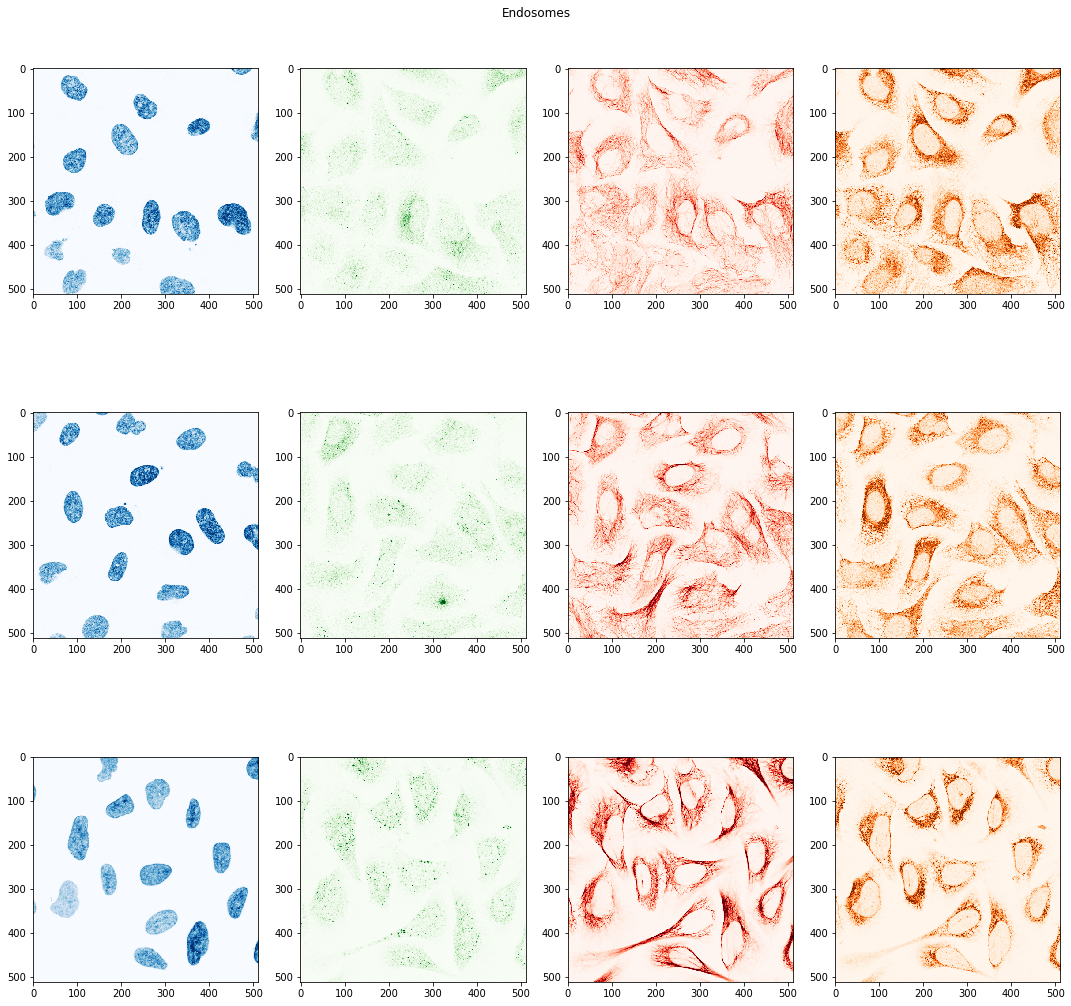

In [19]:
fig, ax = plt.subplots(sample_to_view,4,figsize=(15,5*sample_to_view))

fig.suptitle(class_labels.iloc[class_nbr].Label_Name) 
for i in range(sample_to_view):
    loaded_image=load_image(sample_ids[i],train_img_path)
    ax[i,0].imshow(loaded_image[0], cmap='Blues')
    ax[i,1].imshow(loaded_image[1], cmap='Greens')
    ax[i,2].imshow(loaded_image[2], cmap='Reds')
    ax[i,3].imshow(loaded_image[3], cmap='Oranges')
fig.tight_layout()
plt.show()


In [5]:
# Prediction data
sample_submission=pd.read_csv(folderpath+'sample_submission.csv')
sample_submission.head()

,Id,Predicted
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0


In [9]:
sample_submission2=sample_submission.join(df).fillna(0)
sample_submission2.head()

,Id,Predicted,Cls0,Cls1,Cls2,Cls3,Cls4,Cls5,Cls6,Cls7,...,Cls18,Cls19,Cls20,Cls21,Cls22,Cls23,Cls24,Cls25,Cls26,Cls27
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
print(sample_submission.Predicted.unique())
print(sample_submission.size)

[0]
23404


In [ ]:
A total number of 23,404 testing data are included in the Human Protein Image dataset.

In [25]:
# Save the processed submission file
out_trainfile=folderpath+'submission_v2.csv'
sample_submission2.to_csv(out_trainfile, index=None, encoding='utf-8')

In [26]:
# Explore testing images
from os import listdir

# Check to see if each sample has four-channel images
test_img_path=folderpath+'test'
files=listdir(test_img_path)
print('Length of files:',len(files))              
print('Number of files that are needed:', sample_submission2.shape[0]*4)

Length of files: 46808
Number of files that are needed: 46808


In [15]:
# Verify whether image files are corrupted (Takes time to run)
import os
from PIL import Image

for file in os.listdir(test_img_path):
    try:
        file_path=os.path.join(test_img_path,file)
        img = Image.open(file_path) # open the image file
        img.verify() # verify that it is, in fact an image                
    except (IOError, SyntaxError) as e:
            print(file_path)
            #    print('Bad file:', filename) # print out the names of corrupt files
            os.remove(file_path)  

In [ ]:
# Prepare input data for Pytorch model

In [10]:
# Convert RGBY image to RGB
This step is in a separate python file.

In [25]:
np.random.seed(42)

In [7]:
import os
import pandas as pd
#from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader,Subset
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score


In [26]:
class ImgDataset(Dataset):

    def __init__(self,frames, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.frames = frames
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.frames)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,self.frames.iloc[idx, 0]+'.png')
        #image = open_rgby(img_name)
        #image = load_image(self.frames.iloc[idx, 0],self.root_dir)
        img = Image.open(img_name)
        label=  torch.tensor(self.frames.iloc[idx, 2:].tolist(), dtype=torch.float32)

        if self.transform:
            #temp_img = Image.open(sample['image'])
            img = self.transform(img)
            img /= 255 
            
        sample = {'image': img, 'label': label}
        return sample

In [27]:
# Transform images
#means=np.array([127.5, 127.5, 127.5,127.5])
#stds=np.array([255.0,255.0,255.0,255.0])             
transformer = transforms.Compose([transforms.Resize(128),
                                 transforms.ToTensor()])
                                # transforms.Normalize(means,stds])

In [29]:
# Select classes for analysis
#train_target2=train_target2.iloc[:,[0,1,2,27,23]]
train_target2=train_target2.iloc[:,0:5]
train_target2.head()                      

,Id,Target,Cls0,Cls1,Cls2
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,1,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,1,1,1
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,0,1,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,0,0,0


In [30]:
# Split training data into train and validation datasets
val_split=0.3
train_data, val_data = train_test_split(train_target2, test_size=val_split, random_state=42,shuffle=True)
print(len(train_data))
print(len(val_data))
train_data.head()

21750
9322


,Id,Target,Cls0,Cls1,Cls2
8192,4426d810-bbac-11e8-b2ba-ac1f6b6435d0,0,1,0,0
14978,7c1bdb62-bbac-11e8-b2ba-ac1f6b6435d0,25 21,0,0,0
513,048fbd34-bb9d-11e8-b2b9-ac1f6b6435d0,5,0,0,0
7359,3d2a2562-bbc0-11e8-b2bb-ac1f6b6435d0,25 0,1,0,0
9423,4e6ddc4a-bb9f-11e8-b2b9-ac1f6b6435d0,1,0,1,0


In [65]:
train_data.loc[pd.isnull(train_data['Cls0']) | pd.isnull(train_data['Cls1']) | pd.isnull(train_data['Cls2'])]

,Id,Target,Cls0,Cls1,Cls2


In [31]:
val_data.head()

,Id,Target,Cls0,Cls1,Cls2
21857,b4688e52-bbc5-11e8-b2bc-ac1f6b6435d0,12 23 0,1,0,0
9240,4cfe8bac-bbae-11e8-b2ba-ac1f6b6435d0,0,1,0,0
22022,b5c71b7e-bbb1-11e8-b2ba-ac1f6b6435d0,1 0,1,1,0
9210,4caf27e2-bbb3-11e8-b2ba-ac1f6b6435d0,25 5,0,0,0
11879,6294a60c-bbbf-11e8-b2ba-ac1f6b6435d0,23,0,0,0


In [67]:
val_data.loc[pd.isnull(val_data['Cls0']) | pd.isnull(val_data['Cls1']) | pd.isnull(val_data['Cls2'])]

,Id,Target,Cls0,Cls1,Cls2


10
torch.Size([4, 128, 128])
[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


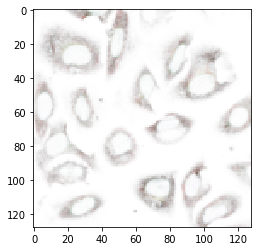

In [49]:
# Testing image import
train_df=train_target2.iloc[0:10]
train_df.head()
train_dataset = ImgDataset(frames=train_df,
                           root_dir=folderpath+'updated_train/', transform=transformer)

print(len(train_dataset))

# Check image and labels
## check the images
print(torchvision.utils.make_grid(train_dataset[1]['image']).shape)
plt.imshow(torchvision.utils.make_grid(train_dataset[1]['image']*255).permute(1, 2, 0))
## check the labels related to the given image
print(train_dataset[1]['label'].numpy())


In [32]:
# Create Dataset and load data
#train_data=train_data.iloc[0:64]
#val_data=val_data.iloc[0:16] 

train_dataset = ImgDataset(frames=train_data,
                           root_dir=folderpath+'updated_train/', transform=transformer)
val_dataset = ImgDataset(frames=val_data,
                           root_dir=folderpath+'updated_train/', transform=transformer)
print(len(train_dataset))
print(len(val_dataset))

batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True, num_workers=0)
validation_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                         batch_size=batch_size,
                                         shuffle=False,num_workers=0)
print(len(train_loader.dataset))
print(len(validation_loader.dataset))

21750
9322
21750
9322


In [70]:
# Testing    
dataiter=next(iter(train_loader))
x, target = dataiter['image'], dataiter['label'].float()
print(x.size(1), target.size(1))
            
#print(len(train_loader.dataset))

4 3


In [33]:
# Create CNN Model
class MultiClassifier(nn.Module):

    def __init__(self,nclasses=3):
        #self.nclasses=3    # This needs to be changed when using different number of classes for developing model
        super(MultiClassifier, self).__init__()
        self.ConvLayer1 = nn.Sequential(nn.Conv2d(in_channels=4, out_channels=16, kernel_size=5, stride=1, padding=0), 
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2)
                                       )
        self.ConvLayer2 = nn.Sequential(nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0), 
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2),
                                        nn.Dropout(0.25)                                          
                                       )
        self.Linear1 = nn.Linear(32 * 29 * 29, 1024)
        self.Linear2 = nn.Linear(1024, 256)
        self.Linear3 = nn.Linear(256, nclasses) 
        
    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = x.view(x.size(0), -1)
        x = self.Linear1(x)
        x = self.Linear2(x)
        x = self.Linear3(x)
        return torch.sigmoid(x)

In [35]:
model=MultiClassifier()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.9, weight_decay = 1e-5)

prob_threshold=0.5

def fit_model(epochs, model, data_loader, phase = 'training'):
    
    print("Epoch: {}".format(epochs))
    if phase == 'training':
        model.train()
        
    if phase == 'validataion':
        model.eval()
        
    running_loss =0
    running_f1 =0
    running_acc=0
    running_macrof1 =0
    cnt=0
    for i, data in enumerate(data_loader):
        
        x, target = data['image'], data['label'].float()
        #print(len(x.shape), len(target))
        #x, target = Variable(x), Variable(target)
        
        if phase == 'training':
            optimizer.zero_grad()
        
        out = model(x)
        loss = criterion(out, target)            

        preds=out.data>prob_threshold
        preds=preds.to(torch.float32)

        if phase == 'training':            
            loss.backward()        
            optimizer.step()
            
        running_loss+=loss.item()*x.size(0)
        yactual=target.to(torch.int).numpy()
        ypred=preds.to(torch.int).numpy()
        
        running_f1+=f1_score(yactual, ypred, average='samples')*x.size(0)
        running_acc+=(ypred==yactual).sum()/yactual.shape[0]/yactual.shape[1]*x.size(0)
        running_macrof1+=f1_score(yactual, ypred, average='macro')
        cnt+= 1
        
    total_batch_loss = running_loss/len(data_loader.dataset)
    total_batch_f1 = running_f1/len(data_loader.dataset)
    total_batch_macrof1 = running_macrof1/cnt   
    total_batch_acc=running_acc/len(data_loader.dataset)
    
    print("{} loss is {} ".format(phase,total_batch_loss))
    print("{} f1-score is {} ".format(phase, total_batch_f1))
    print("{} macro f1-score is {} ".format(phase, total_batch_macrof1))    
    print("{} accuracy is {} ".format(phase, total_batch_acc))    
    return total_batch_loss, total_batch_f1, total_batch_acc, total_batch_macrof1

In [ ]:
#Save Model
train_losses = []
train_f1_scores = []
train_accuracy=[]
train_macrof1_scores = []
valid_losses = [] 
valid_f1_scores = []
valid_accuracy=[]
valid_macrof1_scores = []

n_epochs=5
n_epochs2=0
for i in range(n_epochs):
    train_l, train_f1, train_acc, train_macrof1 = fit_model(i, model, train_loader)
    valid_l, valid_f1, valid_acc,valid_macrof1 = fit_model(i, model, validation_loader, phase = 'validation')
    train_losses.append(train_l) 
    train_f1_scores.append(train_f1)
    train_accuracy.append(train_acc) 
    train_macrof1_scores.append(train_macrof1)    
    valid_losses.append(valid_l); 
    valid_f1_scores.append(valid_f1)
    valid_accuracy.append(valid_acc)  
    valid_macrof1_scores.append(valid_macrof1)    
#torch.save(model,  './saved_models/run')
torch.save({
            'epoch': n_epochs-1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses':train_losses,
            'train_f1_scores':train_f1_scores,
            'train_accuracy':train_accuracy,   
            'train_macrof1_scores':train_macrof1_scores,    
            'valid_losses':valid_losses,
            'valid_f1_scores':valid_f1_scores,
            'valid_accuracy':valid_accuracy, 
            'valid_macrof1_scores':valid_macrof1_scores    
            }, './saved_models/run.pt')

Epoch: 0
training loss is 0.4110530356648325 
training f1-score is 0.385506513409962 
training macro f1-score is 0.1955358734458108 
training accuracy is 0.7374252873563212 
Epoch: 0
validation loss is 0.4039837666410562 
validation f1-score is 0.39404991775727616 
validation macro f1-score is 0.1943545526928081 
validation accuracy is 0.7542372881355932 
Epoch: 1
training loss is 0.4046852619127295 
training f1-score is 0.38827586206896586 
training macro f1-score is 0.19307718472499916 
training accuracy is 0.7518927203065133 
Epoch: 1
validation loss is 0.40256293524976605 
validation f1-score is 0.39404991775727616 
validation macro f1-score is 0.1943545526928081 
validation accuracy is 0.7542372881355932 
Epoch: 2


In [35]:
# Testing f1 score calculation
yactual2=[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
ypred2=[[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1]]
f1=f1_score(yactual2, ypred2, average='samples')*16
print(f1)

2.6853146853146854


In [54]:
# Continue model
checkpoint=torch.load('./saved_models/run.pt')
model = MultiClassifier()
#model==torch.load('./saved_models/run')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

train_losses = []
train_f1_scores = []
train_accuracy=[]
train_macrof1_scores = []
valid_losses = [] 
valid_f1_scores = []
valid_accuracy=[]
valid_macrof1_scores = []

train_losses = checkpoint['train_losses']
train_f1_scores = checkpoint['train_f1_scores']
train_accuracy=checkpoint['train_accuracy']
train_macrof1_scores = checkpoint['train_macrof1_scores']
valid_losses = checkpoint['valid_losses']
valid_f1_scores = checkpoint['valid_f1_scores']
valid_accuracy=checkpoint['valid_accuracy']
valid_macrof1_scores = checkpoint['valid_macrof1_scores']

n_epochs2=3
for i in range(n_epochs2):
    train_l, train_f1, train_acc, train_macrof1 = fit_model(i, model, train_loader)
    valid_l, valid_f1, valid_acc,valid_macrof1 = fit_model(i, model, validation_loader, phase = 'validation')
    train_losses.append(train_l) 
    train_f1_scores.append(train_f1)
    train_accuracy.append(train_acc) 
    train_macrof1_scores.append(train_macrof1)    
    valid_losses.append(valid_l); 
    valid_f1_scores.append(valid_f1)
    valid_accuracy.append(valid_acc)  
    valid_macrof1_scores.append(valid_macrof1)    
#torch.save(model,  './saved_models/run')
torch.save({
            'epoch': n_epochs-1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_losses':train_losses,
            'train_f1_scores':train_f1_scores,
            'train_accuracy':train_accuracy,   
            'train_macrof1_scores':train_macrof1_scores,    
            'valid_losses':valid_losses,
            'valid_f1_scores':valid_f1_scores,
            'valid_accuracy':valid_accuracy, 
            'valid_macrof1_scores':valid_macrof1_scores    
            }, './saved_models/run.pt')

Epoch: 0
training loss is 0.6681330502033234 
training f1-score is 0.0 
training macro f1-score is 0.0 
training accuracy is 0.8229166666666667 
Epoch: 0
validation loss is 0.6664933562278748 
validation f1-score is 0.0 
validation macro f1-score is 0.0 
validation accuracy is 0.8541666666666666 
Epoch: 1
training loss is 0.6681444048881531 
training f1-score is 0.0 
training macro f1-score is 0.0 
training accuracy is 0.8229166666666666 
Epoch: 1
validation loss is 0.6666853427886963 
validation f1-score is 0.0 
validation macro f1-score is 0.0 
validation accuracy is 0.8541666666666666 
Epoch: 2
training loss is 0.6681747436523438 
training f1-score is 0.0 
training macro f1-score is 0.0 
training accuracy is 0.8229166666666666 
Epoch: 2
validation loss is 0.6662065982818604 
validation f1-score is 0.0 
validation macro f1-score is 0.0 
validation accuracy is 0.8541666666666666 


In [135]:
#print(n_epochs, n_epochs2)
#print(len(train_losses), len(valid_losses))

2 3
5 5


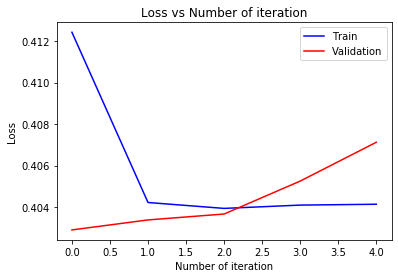

In [75]:
# visualization loss 
plt.plot(range(n_epochs+n_epochs2),train_losses, color = "blue",label='Train')
plt.plot(range(n_epochs+n_epochs2),valid_losses, color = "red", label='Validation')
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Number of iteration")
plt.legend()
plt.show()

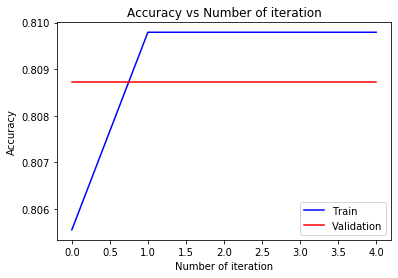

In [76]:
# visualization of accuracy
plt.plot(range(n_epochs+n_epochs2),train_accuracy, color = "blue",label='Train')
plt.plot(range(n_epochs+n_epochs2),valid_accuracy, color = "red", label='Validation')
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of iteration")
plt.legend()
plt.show()

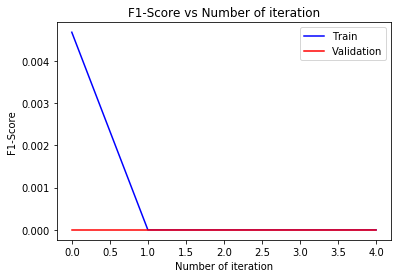

In [77]:
# visualization of f1-score
plt.plot(range(n_epochs+n_epochs2),train_f1_scores,color = "blue",label='Train')
plt.plot(range(n_epochs+n_epochs2),valid_f1_scores,color = "red", label='Validation')
plt.xlabel("Number of iteration")
plt.ylabel("F1-Score")
plt.title("F1-Score vs Number of iteration")
plt.legend()
plt.show()

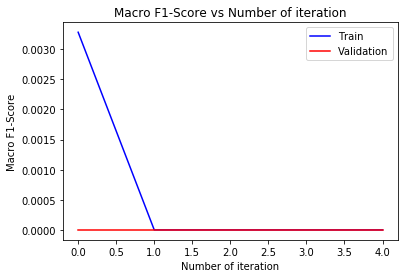

In [78]:
# visualization of macro f1-score
plt.plot(range(n_epochs+n_epochs2),train_macrof1_scores,color = "blue",label='Train')
plt.plot(range(n_epochs+n_epochs2),valid_macrof1_scores,color = "red", label='Validation')
plt.xlabel("Number of iteration")
plt.ylabel("Macro F1-Score")
plt.title("Macro F1-Score vs Number of iteration")
plt.legend()
plt.show()

In [141]:
#mean , std = torch.tensor([0.485, 0.456, 0.406]),torch.tensor([0.229, 0.224, 0.225])
def denormalize(image):
    image = image.clone().detach()
    image=image*255
    image=transforms.ToPILImage()(image)
    #image = transforms.Normalize(-mean/std,1/std)(image) #denormalize
    #image = image.permute(1,2,0) 
    #image = torch.clamp(image,0,1)
    image = transforms.Resize(512)(image)
    return image

def visualize(image, actual , pred):
    fig,ax = plt.subplots(figsize=(8,8))
    ax.imshow(denormalize(image))
    ax.grid(False)    
    classes=np.where(actual == 1)[0]
    for i , s in enumerate(classes):
        ax.text(0 , i*20  , s , verticalalignment='top', color="blue", fontsize=12, weight='bold')
 
    classes=np.where(pred == 1)[0]
    for i , s in enumerate(classes):
        ax.text(485 , i*20  , s , verticalalignment='top', color="red", fontsize=12, weight='bold')

    plt.show()

#visualize(image[0] , label[0].tolist() , output[0].tolist())


torch.Size([16, 4, 128, 128]) torch.Size([16, 28])


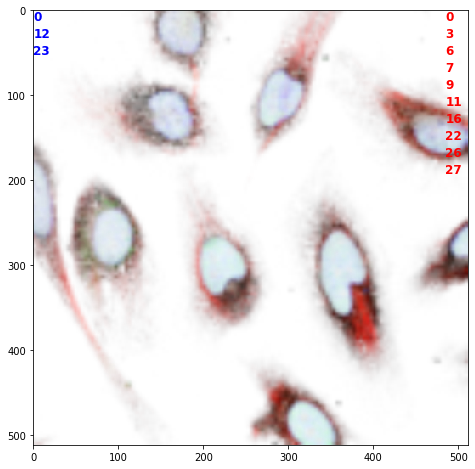

In [143]:
# Visualize results
dataiter=next(iter(validation_loader))
image = dataiter['image']
label = dataiter['label']
print(image.shape, label.shape)

checkpoint=torch.load('./saved_models/run.pt')
model = MultiClassifier()
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

#model = MultiClassifier()
#model_path='./saved_models/run'+str(run_index)
#model.load_state_dict(torch.load(model_path))
model=model.eval()
output = model(image)
output = output>prob_threshold
image_id=0
visualize(image[image_id], label[image_id], output[image_id])
#output=output.detach().numpy()
#preds = np.where(out == 1)[1]

In [173]:
# Prediction
submission_filename='submission_v2.csv'
submission=pd.read_csv(folderpath+submission_filename)
submission.drop(['Predicted'], axis=1, inplace=True)
submission.head()

,Id,Cls0,Cls1,Cls2,Cls3,Cls4,Cls5,Cls6,Cls7,Cls8,...,Cls18,Cls19,Cls20,Cls21,Cls22,Cls23,Cls24,Cls25,Cls26,Cls27
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
def predict(model, submission_df, batch_size=16):
    test_dataset=ImgDataset(submission_df,
                           root_dir=folderpath+'updated_test/',transform=transformer)
    test_loader=torch.torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False,num_workers=0)    

    for i, data in enumerate(test_loader):
        #dataiter = next(iter(test_loader))
        #image = dataiter['image']
        image=data['image']
        print(image.shape)
        out = model(image)
        out=out>prob_threshold        
        label=out.to(torch.int).detach().numpy()
        print(label.shape)
        submission_df.iloc[i:batch_size,1:]=label
    return submission_df

# Prediction
pred_start_index=0
pred_len=16
#out_trainfile=folderpath+'submission_v3.csv'
#submission=pd.read_csv(out_trainfile)
submission_data=submission.iloc[pred_start_index:pred_len]
submission_data.head()

checkpoint=torch.load('./saved_models/run.pt')
model = MultiClassifier()
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
model=model.eval()

#model_path='./saved_models/run'+str(run_index)
#model=torch.load(model_path)
#model=model.eval()
final_submission=predict(model, submission_data,batch_size)
final_submission.head(batch_size)

torch.Size([16, 4, 128, 128])
(16, 28)


,Id,Cls0,Cls1,Cls2,Cls3,Cls4,Cls5,Cls6,Cls7,Cls8,...,Cls18,Cls19,Cls20,Cls21,Cls22,Cls23,Cls24,Cls25,Cls26,Cls27
0,00008af0-bad0-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
1,0000a892-bacf-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
2,0006faa6-bac7-11e8-b2b7-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
3,0008baca-bad7-11e8-b2b9-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
4,000cce7e-bad4-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
5,00109f6a-bac8-11e8-b2b7-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
6,001765de-bacd-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
7,0018641a-bac9-11e8-b2b8-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
8,00200f22-bad7-11e8-b2b9-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
9,0026f154-bac6-11e8-b2b7-ac1f6b6435d0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,1
